In [1]:
import os
import sys
project_path = '../'
sys.path.append(project_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from src.pipeline.eda_functions import (
    setup_figure,
    get_bills,
    get_repro_bill_fraction_state,
    get_repro_bill_frac_year,
    get_bill_versions
)

from src.utils.general import get_db_conn

In [3]:
creds_folder = '../conf/local/'
fpath = os.path.join(creds_folder, 'credentials.yaml')

In [4]:
figures_path = 'images/'

In [5]:
db_con = get_db_conn(fpath)

#### bills

In [6]:
all_bills, repro_bills = get_bills(db_con)

In [7]:
repro_bills.merge(all_bills, on='bill_id', how='left').head()

,bill_id,last_ver_date,first_ver_date,session_id,session_name,session_special,session_title,session_year_start,session_year_end,status,state_id,state_abbreviation,state
0,28484,2010-03-09,2009-11-30,23,2010 Regular Session,0,Regular Session,2010,2010,4,46.0,VA,virginia
1,28487,2010-04-21,2010-04-21,23,2010 Regular Session,0,Regular Session,2010,2010,4,46.0,VA,virginia
2,28488,2009-12-07,2009-12-07,23,2010 Regular Session,0,Regular Session,2010,2010,4,46.0,VA,virginia
3,28491,2010-01-27,2009-12-07,23,2010 Regular Session,0,Regular Session,2010,2010,2,46.0,VA,virginia
4,28496,2010-03-04,2009-12-18,23,2010 Regular Session,0,Regular Session,2010,2010,4,46.0,VA,virginia


### Repro fraction

In [8]:
frac_by_state = get_repro_bill_fraction_state(all_bills, repro_bills)

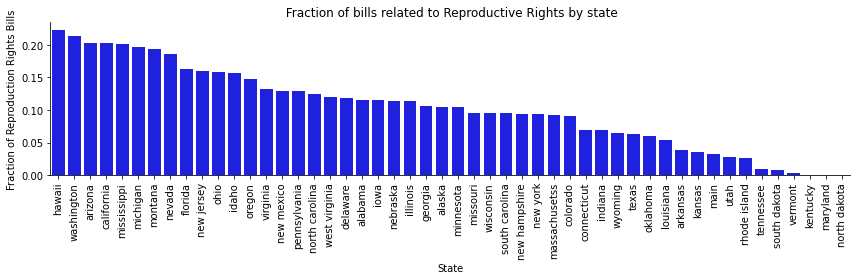

In [14]:
fig, ax = setup_figure((12,4))
sns.barplot(data=frac_by_state, x='state', y='repro_frac', ax=ax, hue=None, color='blue')
ax.set_ylabel('Fraction of Reproduction Rights Bills')
ax.set_xlabel('State')
ax.set_title(' Fraction of bills related to Reproductive Rights by state')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

fname = 'eda_1_1_frac.png'
plt.tight_layout()
plt.savefig(os.path.join(figures_path, fname), dpi=300, bbox_inches='tight')

### Repro fraction by state by by year

In [15]:
combined = get_repro_bill_frac_year(all_bills, repro_bills)

In [16]:
combined.reset_index(inplace=True)

In [19]:
combined = combined.sort_values(by='state')

/home/kasun/.pyenv/versions/aclu/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


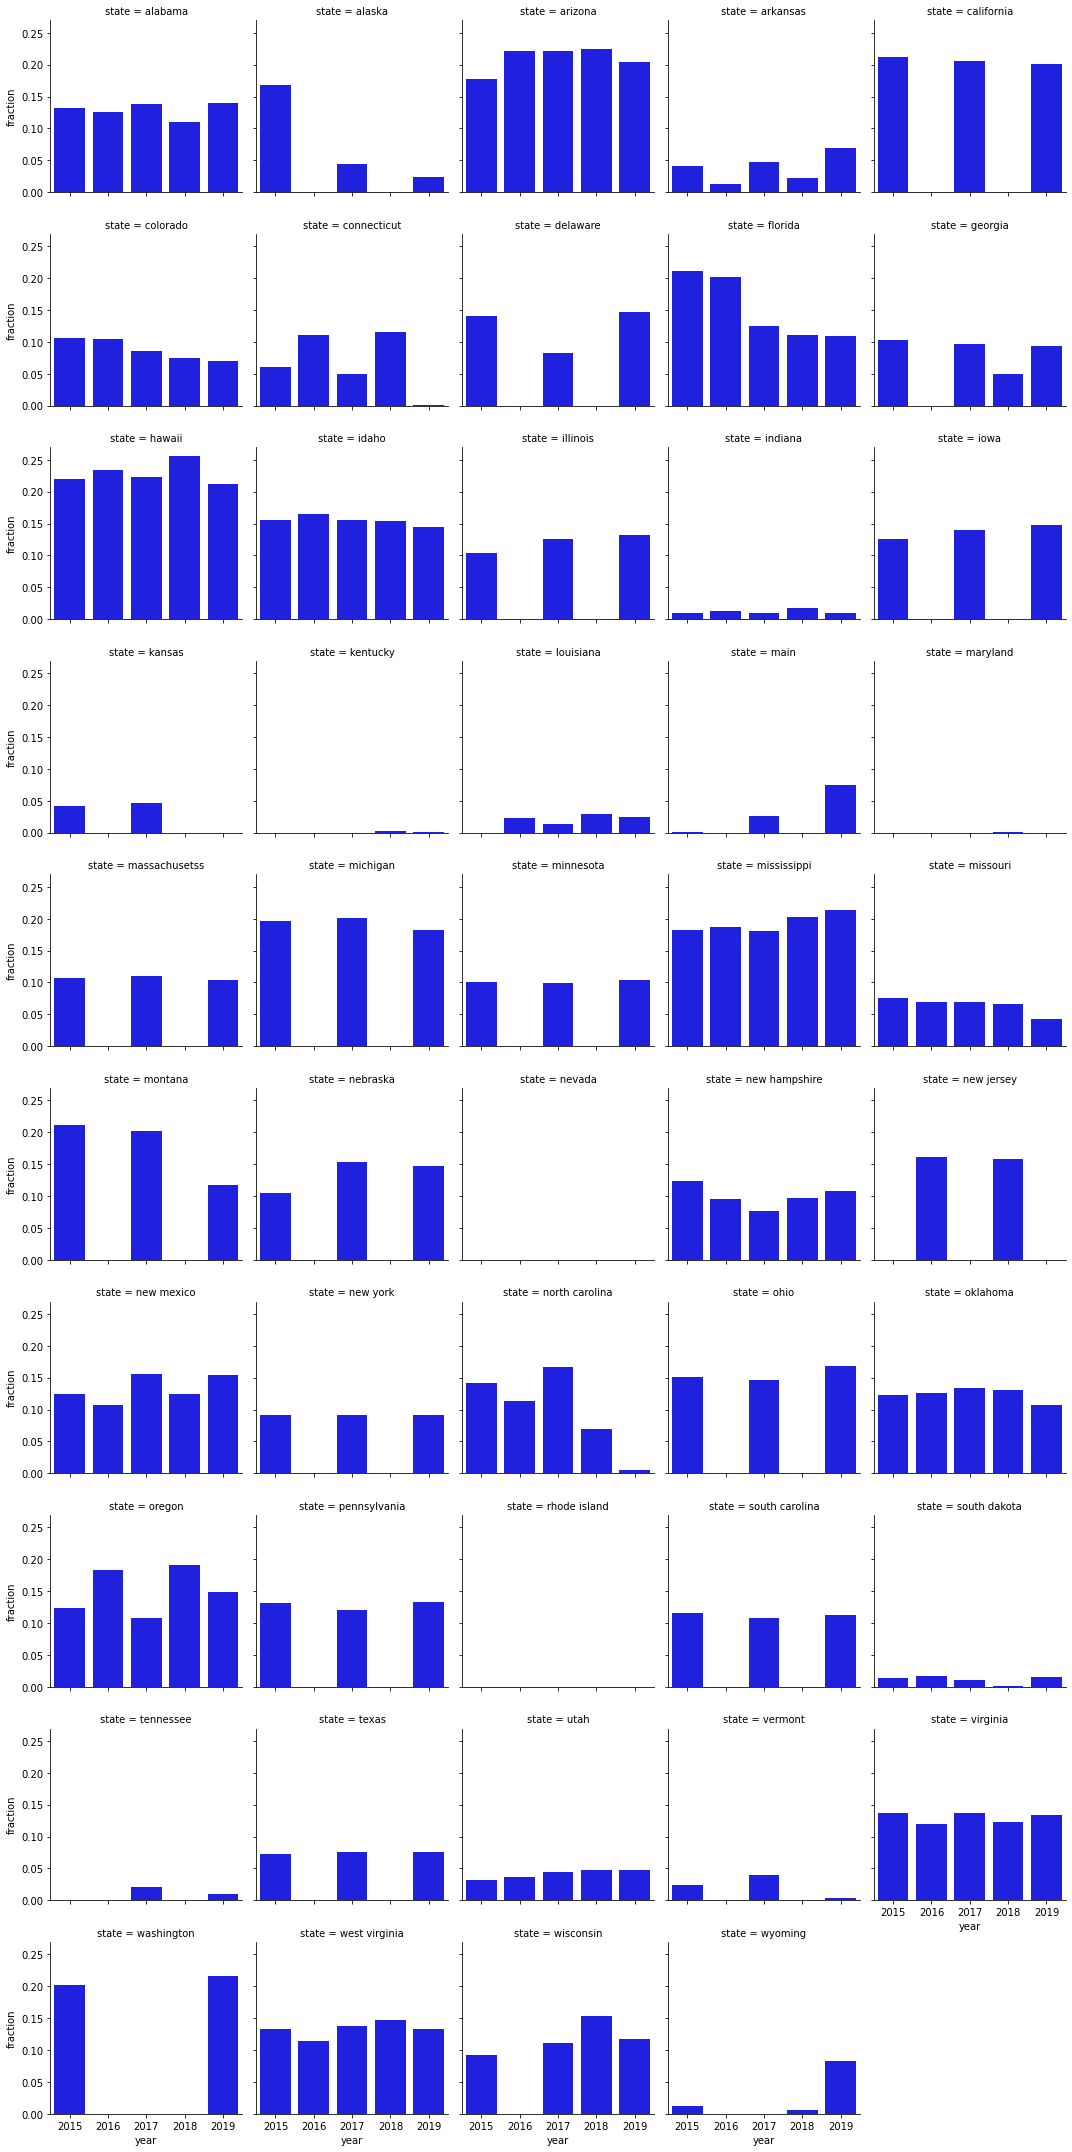

In [20]:
g = sns.FacetGrid(combined, col='state', col_wrap=5, height=3, sharex=True, sharey=True, dropna=False)
g = g.map(sns.barplot, 'year', 'fraction', color='blue')
fname = 'eda_1_2_frac_time.png'
plt.tight_layout()
plt.savefig(os.path.join(figures_path, fname), dpi=300, bbox_inches='tight')

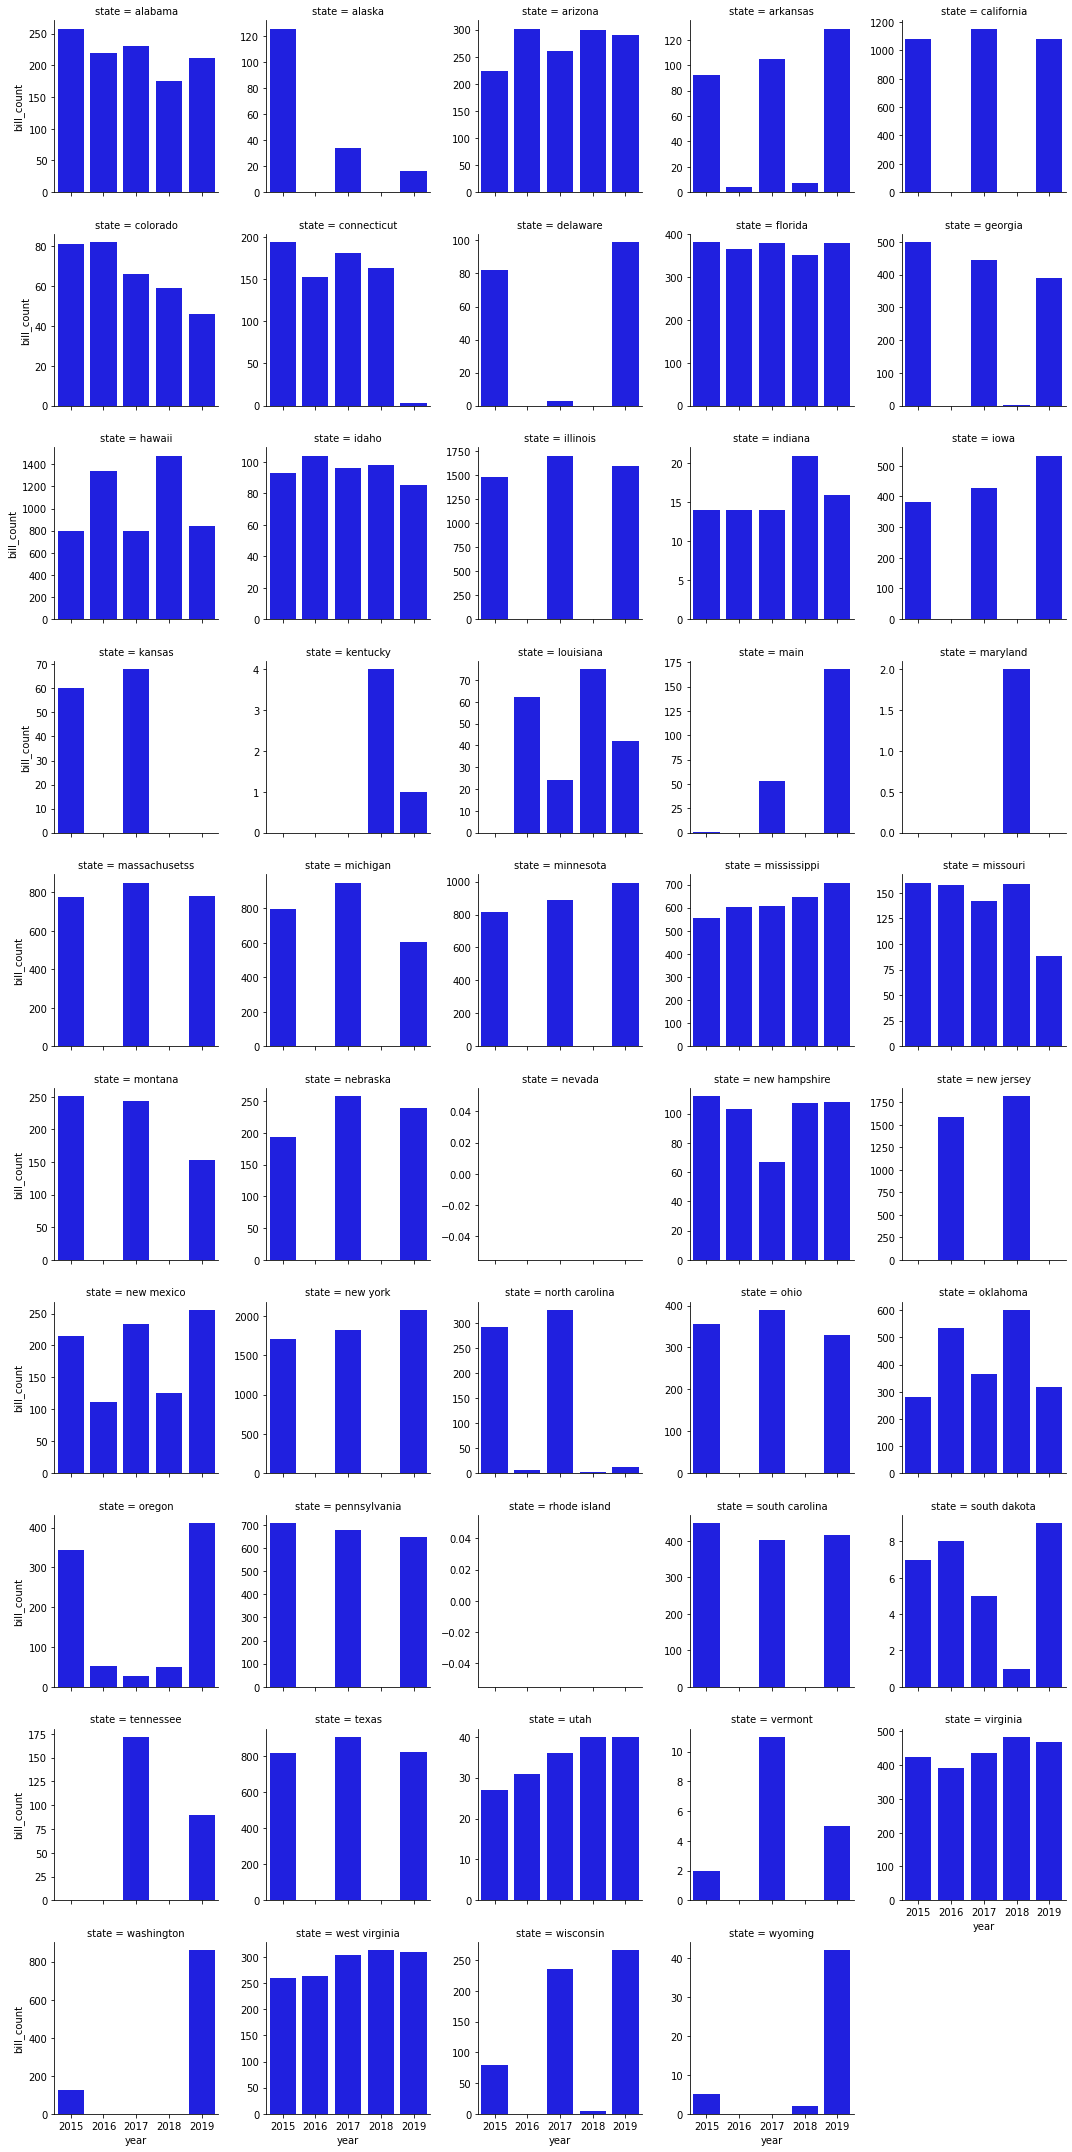

In [22]:
g = sns.FacetGrid(combined, col='state', col_wrap=5, height=3, sharex=True, sharey=False, dropna=False)
g = g.map(sns.barplot, 'year', 'bill_count', color='blue')

### Versions

In [23]:
all_bill_versions, repro_bill_versions = get_bill_versions(db_con)

#### Country level

Text(0.5, 1.0, 'Distribution of version counts of bills')

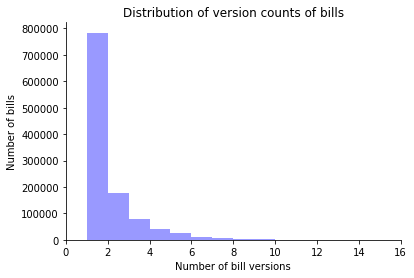

In [24]:
fig, ax = setup_figure((6, 4))
bins = np.arange(0, 15, 1)
sns.distplot(all_bill_versions['num_versions'], kde=False, ax=ax, bins=bins, color='blue')
ax.set_xlim(0,16)
ax.set_xlabel('Number of bill versions')
ax.set_ylabel('Number of bills')
ax.set_title('Distribution of version counts of bills')

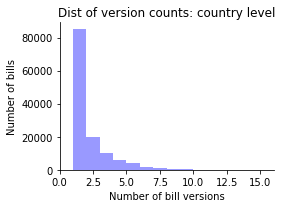

In [44]:
fig, ax = setup_figure((4, 3))
sns.distplot(repro_bill_versions['num_versions'], kde=False, ax=ax, bins=bins, color='blue')
ax.set_xlim(0,16)
ax.set_xlabel('Number of bill versions')
ax.set_ylabel('Number of bills')
ax.set_title('Dist of version counts: country level')

fname = 'eda_2_1_version_dist.png'
plt.tight_layout()
plt.savefig(os.path.join(figures_path, fname), dpi=300, bbox_inches='tight')

#### State

In [28]:
all_bill_versions_info = all_bill_versions.merge(all_bills, on='bill_id', how='left')
repro_bill_versions_info = repro_bill_versions.merge(all_bills, on='bill_id', how='left')

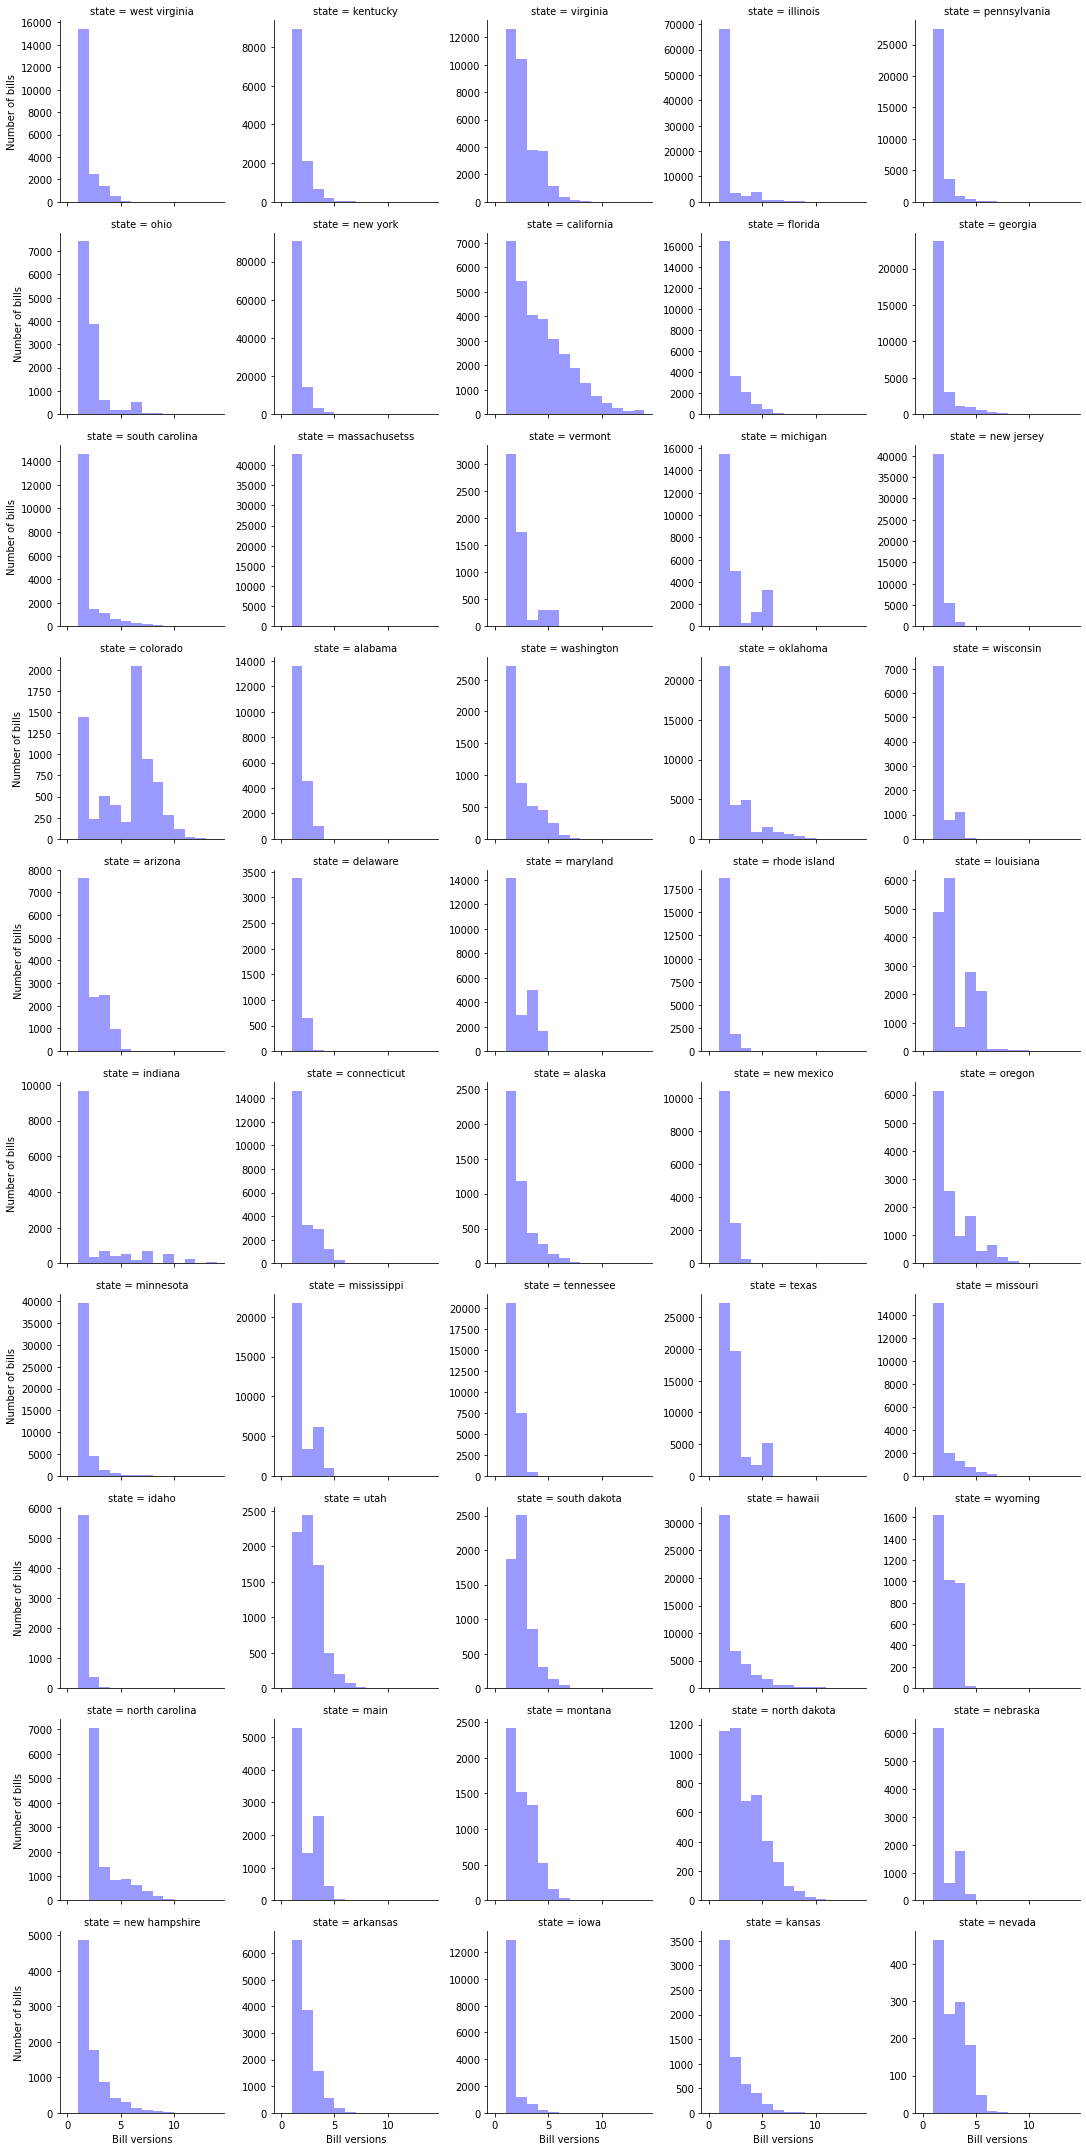

In [29]:
bins = np.arange(0, 15, 1)
g = sns.FacetGrid(all_bill_versions_info, col='state', col_wrap=5, sharex=True, sharey=False, dropna=False)
g = g.map(sns.distplot, 'num_versions', kde=False, bins=bins, color='blue')
g.set_ylabels('Number of bills')
g.set_xlabels('Bill versions')

In [30]:
repro_bill_versions_info.sort_values(by='state', inplace=True)

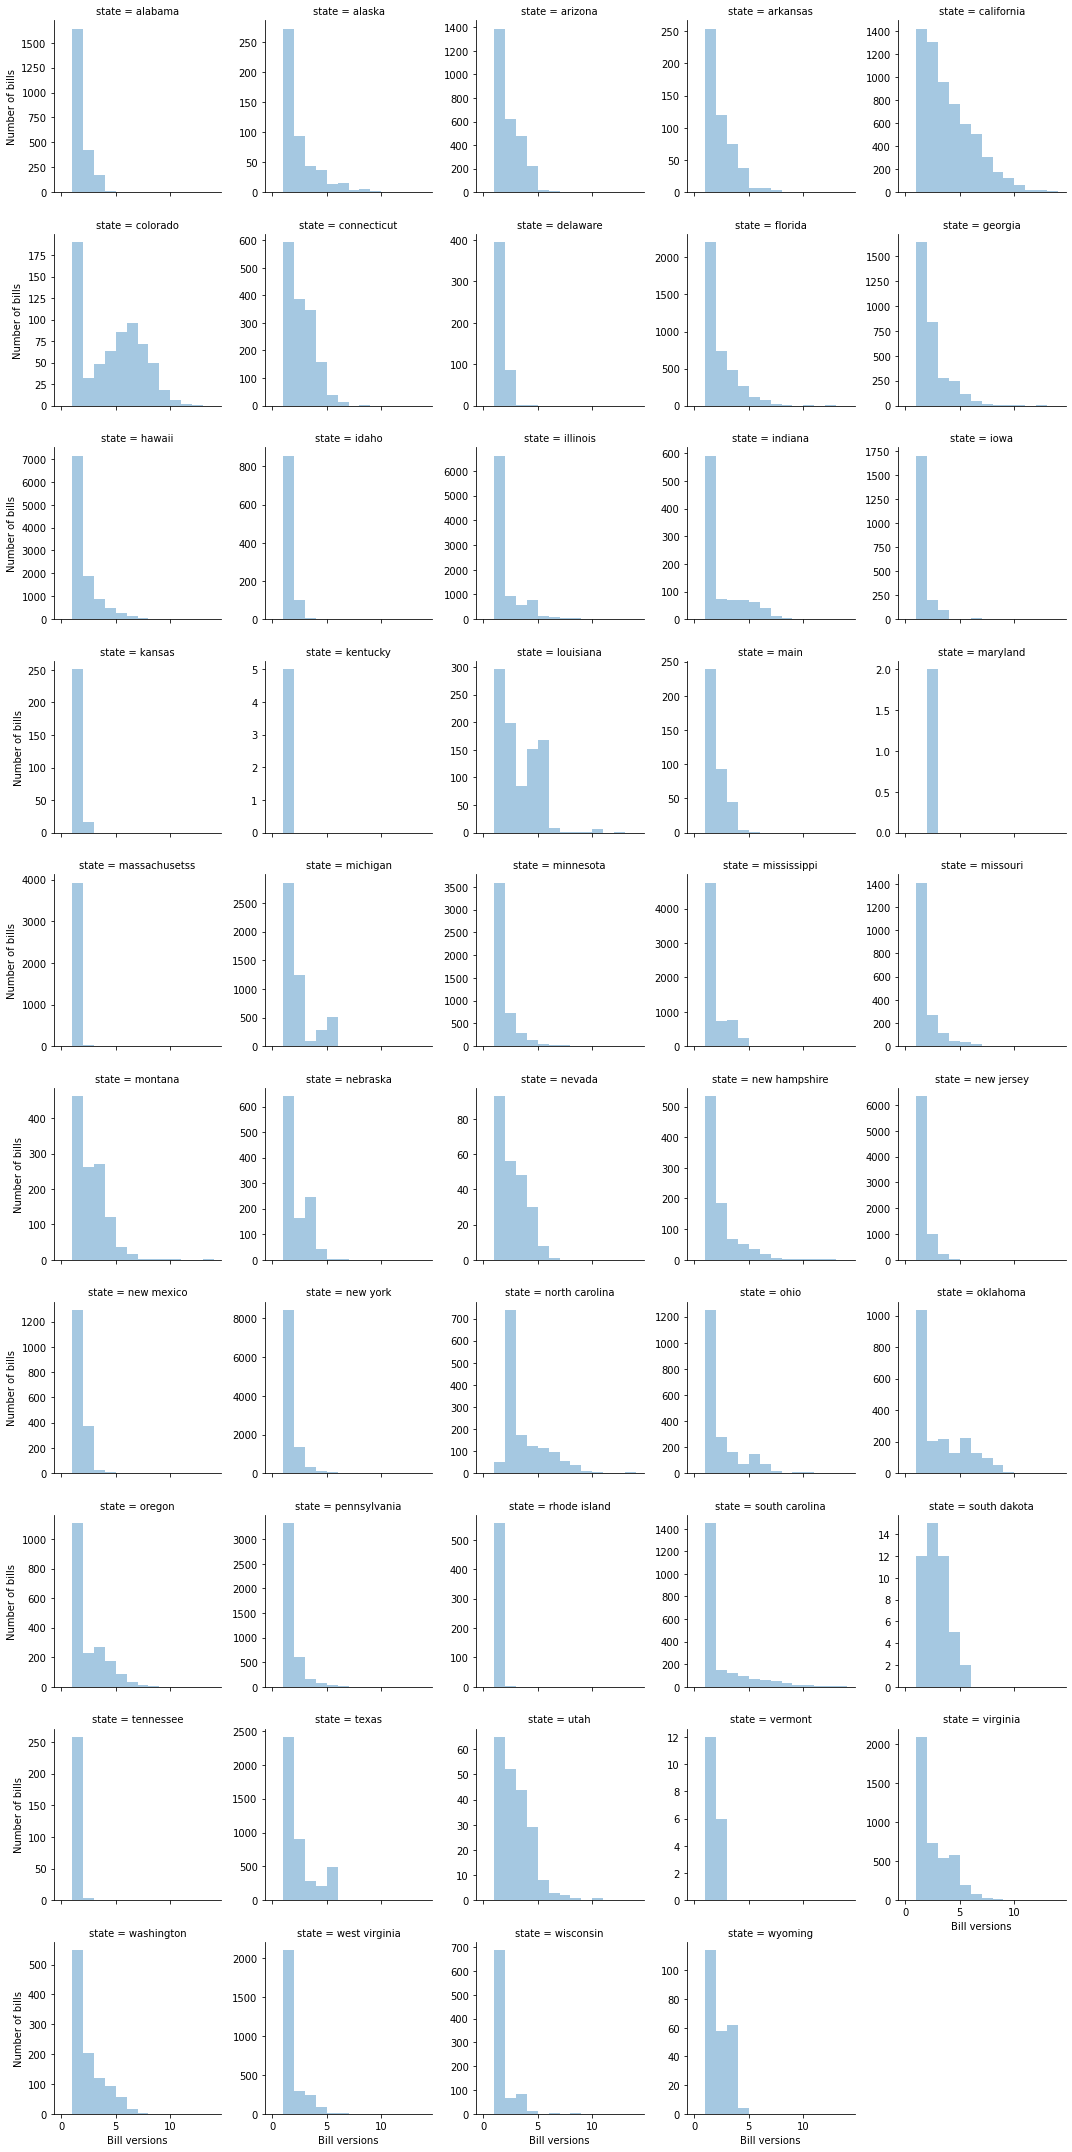

In [32]:
bins = np.arange(0, 15, 1)
g = sns.FacetGrid(repro_bill_versions_info, col='state', col_wrap=5, sharex=True, sharey=False, dropna=False)
g = g.map(sns.distplot, 'num_versions', kde=False, bins=bins)
g.set_ylabels('Number of bills')
g.set_xlabels('Bill versions')

fname = 'eda_2_2_version_state.png'
plt.tight_layout()
plt.savefig(os.path.join(figures_path, fname), dpi=300, bbox_inches='tight')

#### Across time

In [33]:
msk = (all_bill_versions_info['session_year_start'] > 2014) & (all_bill_versions_info['session_year_start'] < 2021) 

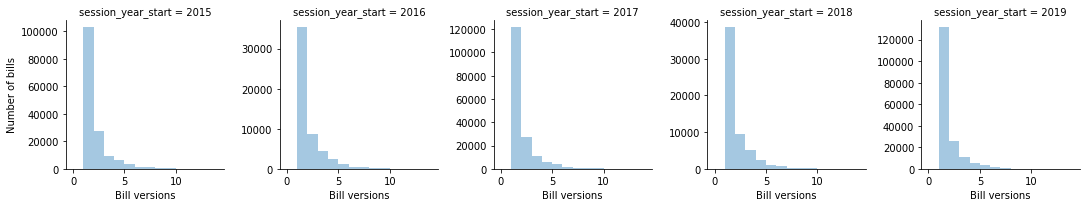

In [34]:
bins = np.arange(0, 15, 1)
g = sns.FacetGrid(all_bill_versions_info[msk], col='session_year_start', col_wrap=5, sharex=True, sharey=False, dropna=False)
g = g.map(sns.distplot, 'num_versions', kde=False, bins=bins)
g.set_ylabels('Number of bills')
g.set_xlabels('Bill versions')

In [35]:
msk2 = (repro_bill_versions_info['session_year_start'] > 2014) & (repro_bill_versions_info['session_year_start'] < 2021) 

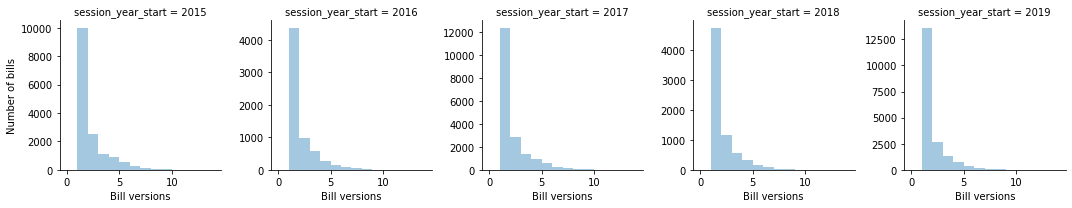

In [37]:
bins = np.arange(0, 15, 1)
g = sns.FacetGrid(repro_bill_versions_info[msk2], col='session_year_start', col_wrap=5, sharex=True, sharey=False, dropna=False)
g = g.map(sns.distplot, 'num_versions', kde=False, bins=bins)
g.set_ylabels('Number of bills')
g.set_xlabels('Bill versions')

fname = 'eda_2_3_version_time.png'
plt.tight_layout()
plt.savefig(os.path.join(figures_path, fname), dpi=300, bbox_inches='tight')

### World clouds

In [7]:
from elasticsearch import Elasticsearch
from wordcloud import WordCloud, STOPWORDS 
import re

from src.pipeline.eda_functions import repro_word_cloud_country
from src.pipeline.eda_functions import _preprocess_text_for_cloud
import joblib

In [8]:
es = Elasticsearch([{'host':'localhost','port':9200}])

In [9]:
q = """ select bill_id, doc_id from temp_eda.repro_labels_all;"""
repro_docids = pd.read_sql(q, db_con)
# repro_docids = [int(x) for x in repro_docids['doc_id'].tolist()]
repro_docids['doc_id'] = repro_docids['doc_id'].astype(int).astype(str)
repro_docids['bill_id'] = repro_docids['bill_id'].astype(int).astype(str)

In [10]:
# repro_docids.head()

In [11]:
states = list(all_bills['state'].unique())

In [12]:
repro_docids_deets = repro_docids.merge(all_bills, on='bill_id', how='left')

In [ ]:
def get_doc(row):
    doc_id = '{}_{}'.format(row['bill_id'], row['doc_id'])
    t = es.get_source(index='bill_text', id=doc_id, _source_includes=['doc', 'doc_date', 'doc_id', 'bill_id'])
    
    return t

for state_used in states:
    msk = repro_docids_deets['state'] == state_used
    repro_docids_deets[msk].shape
    bill_texts = repro_docids_deets[msk].apply(get_doc, axis=1)
    bill_texts = pd.DataFrame(bill_texts.tolist())
    bill_texts['doc'] = bill_texts['doc'].str.lower()
    
    wordcloud = repro_word_cloud_country(es, db_con, bill_texts)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    fname = 'eda_3_2_{}.png'.format(state_used)
    plt.tight_layout()
    plt.savefig(os.path.join(figures_path, fname), dpi=300, bbox_inches='tight')

In [13]:
state_used = states[1]
msk = repro_docids_deets['state'] == state_used
repro_docids_deets[msk].shape

(949, 12)

In [15]:
bill_texts = repro_docids_deets[msk].apply(get_doc, axis=1)

In [16]:
bill_texts = pd.DataFrame(bill_texts.tolist())

In [17]:
bill_texts['doc'] = bill_texts['doc'].str.lower()

In [21]:
# with open('{}_repro_bills.txt'.format(state_used), 'w') as f:
#     for bill_text in bill_texts['doc'].tolist():
#         f.write(' {}'.format(bill_text))

In [22]:
# f = open('{}_repro_bills.txt'.format(state_used))
# s = f.read()

In [18]:
wordcloud = repro_word_cloud_country(es, db_con, bill_texts)

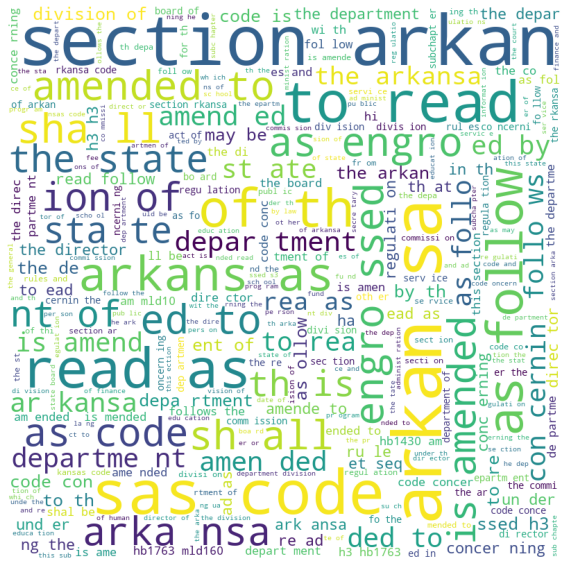

In [19]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

fname = 'eda_3_2_{}.png'.format(state_used)
plt.tight_layout()
plt.savefig(os.path.join(figures_path, fname), dpi=300, bbox_inches='tight')

In [11]:
repro_texts = repro_texts.groupby('bill_id', as_index=False)['doc_date'].max().merge(repro_texts, on=['bill_id', 'doc_date'], how='left')

In [12]:
all_docs = repro_texts['doc'].tolist()
all_docs = [x.lower() for x in all_docs]

In [13]:
whitelist = set('abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [14]:
cleaned = [''.join(filter(whitelist.__contains__, x)) for x in all_docs]

In [15]:
stopwords = set(STOPWORDS)

In [16]:
stop_word_removed = []
for bill in cleaned:
    temp = [x for x in bill.split(' ') if x not in stopwords]
    stop_word_removed.append(' '.join(temp))
    

In [ ]:
wordcloud_country = repro_word_cloud_country(es, db_con, bill_texts)

In [22]:
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(' '.join(stop_word_removed))

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

fname = 'eda_3_1_country.png'
plt.tight_layout()
plt.savefig(os.path.join(figures_path, fname), dpi=300, bbox_inches='tight')

In [100]:
repro_texts['doc'] = repro_texts['doc'].str.lower()

In [74]:
whitelist = set('abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ')
repro_texts['doc'] = repro_texts['doc'].apply(lambda x: ''.join(filter(whitelist.__contains__, x)))

In [13]:
# repro_texts['doc'].iloc[0]

In [13]:
# repro_texts['doc'].head()

In [75]:
word_dict = dict()
save_path = '../data/word_dict.pkl'

In [78]:
for i in range(repro_texts['doc'].shape[0]):
    txt = repro_texts['doc'].iloc[i]
    
    for w in txt.split(' '):
        if w in word_dict:
            word_dict[w] += 1
        else:
            word_dict[w] = 1    
            
joblib.dump(word_dict, save_path)

['../data/word_dict.pkl']

### Filtering words and then recreating the string

In [58]:
word_dict = joblib.load(save_path)

In [79]:
len(word_dict)

2076988

In [80]:
def filter_words(word_dict, upper_lim, lower_lim):
    wd = word_dict.copy()
    pop_elements = []
    for w, f in word_dict.items():        
        if (f < lower_lim) or (f > upper_lim):
            pop_elements.append(w)
            
    for e in pop_elements:
        wd.pop(e)
        
    return wd


def remove_words(bill, word_dict):
    bill_str = ''
    for w in bill.split(' '):
        if w in word_dict:
            bill_str = bill_str + ' ' + w
            
    return bill_str

In [85]:
wd_filtered = filter_words(word_dict, 1000000, 50)

In [86]:
len(wd_filtered)

138197

In [87]:
repro_texts['doc'] = repro_texts['doc'].apply(lambda x: remove_words(x, wd_filtered))

In [88]:
repro_texts['doc'].head()

0     amend reenact ofvirginia relating duties coun...
1     virginia acts assembly chapteran amend virgin...
2     amend virginia adding sectionnumbered relatin...
3     dhouse bill offered january prefiled december...
4     dhouse bill amendment nature substitutepropos...
Name: doc, dtype: object

In [101]:
complete_string = '. '.join(repro_texts['doc'].tolist())

In [102]:
complete_string[:200] 

'chapter 68\nan act to amend and reenact §23-9.6:1 of the code of\r\nvirginia, relating to duties of the state council of higher education for\r\nvirginia. \n[h 7]\napproved march 9, 2010\nbe it enacted by the'

In [53]:
# words = [x for x, _ in word_dict.items()]

In [54]:
# len(words)

2336160

In [91]:
words = ''
for doc in repro_texts['doc'].tolist():
    # text = str(doc)
    tokens = doc.split()

    words += " ".join(tokens)+" "

In [1]:
len(words)

NameError: name 'words' is not defined

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10, max_words=1000).generate(complete_string)

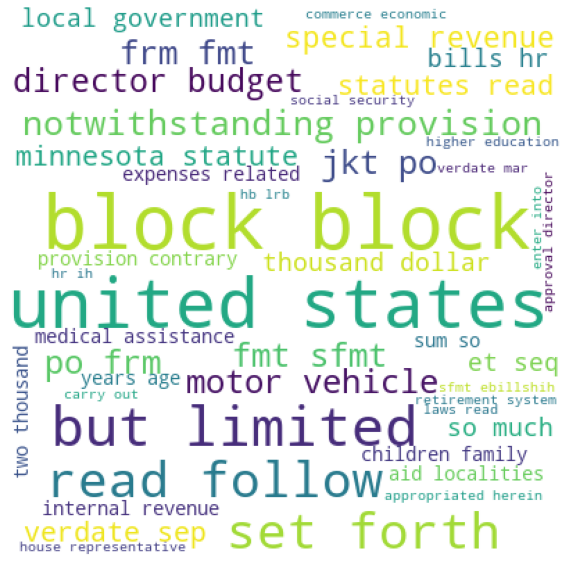

In [95]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

fname = 'eda_3_2_{}.png'.format(state_used)
plt.tight_layout()
plt.savefig(os.path.join(figures_path, fname), dpi=300, bbox_inches='tight')

In [29]:
wordcloud_country = repro_word_cloud_country(es, db_con, bill_texts)

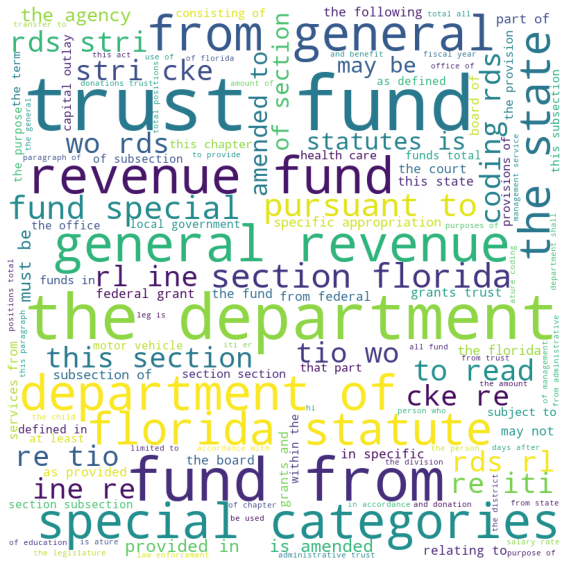

In [31]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_country) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

fname = 'eda_3_2_{}.png'.format(state_used)
plt.tight_layout()
plt.savefig(os.path.join(figures_path, fname), dpi=300, bbox_inches='tight')

In [16]:
last_doc_date = repro_texts.groupby('bill_id', as_index=False)['doc_date'].max()
repro_texts_last = last_doc_date.merge(repro_texts, on=['bill_id', 'doc_date'], how='left')

In [ ]:
repro_texts_last['preprocessed_text'] = _preprocess_text_for_cloud(repro_texts_last)

In [ ]:
wordcloud_country

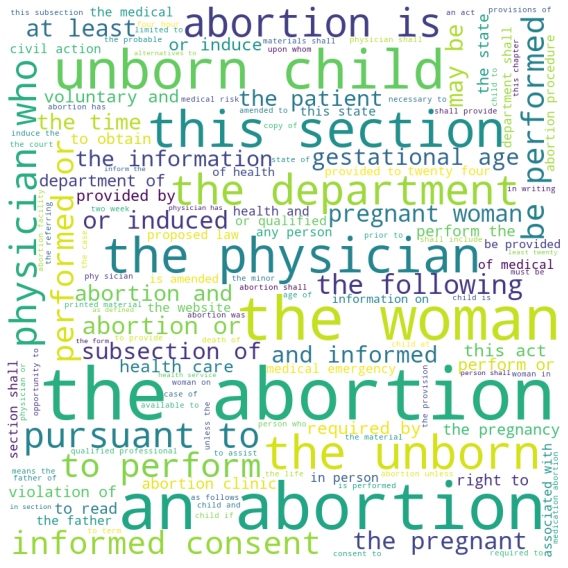

In [12]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_country) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

fname = 'eda_3_1_country.png'
plt.tight_layout()
plt.savefig(os.path.join(figures_path, fname), dpi=300, bbox_inches='tight')